In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('scope_11.csv', delimiter=',', skiprows=1)

In [3]:
df

,second,Volt,Volt.1
0,-0.000369,NaN,NaN
1,-0.000369,NaN,NaN
2,-0.000369,NaN,NaN
3,-0.000369,NaN,NaN
4,-0.000369,NaN,NaN
...,...,...,...
62495,0.000631,-0.036200,-0.001471
62496,0.000631,-0.036200,-0.001974
62497,0.000631,-0.037707,-0.001974
62498,0.000631,-0.040220,-0.001672


In [4]:
df = df.dropna()


In [5]:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# 


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


In [6]:
df
t = df.iloc[:,0] * 1e6 #us!
trans = df.iloc[:,1]
errsig = df.iloc[:,2]

Text(0.5, 0, 'Time ($\\mu$s)')

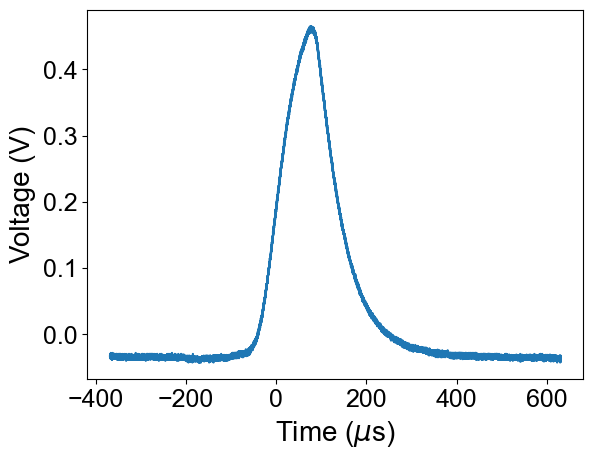

In [7]:
plt.plot(t,trans, label='Transmission')
plt.ylabel('Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
# plt.plot(t,errsig, label='Error signal')
# plt.fill_between

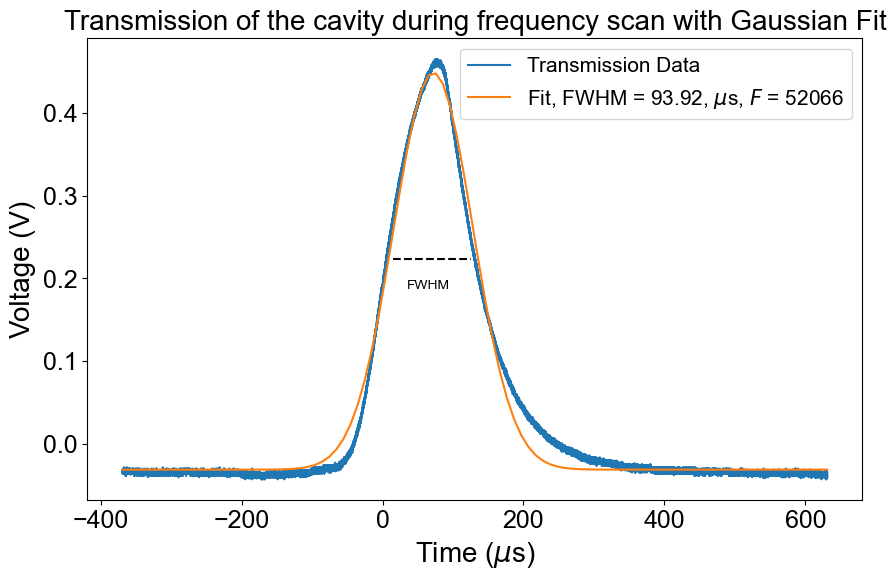

FWHM: -93.91968457268256


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, offset):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2) + offset

# Prepare the data
x = t.values
y = trans.values

# Perform the curve fitting
p0 = [1, np.mean(x), np.std(x), 20]  # Initial guess for the parameters
params, _ = curve_fit(gaussian, x, y, p0=p0)

# Extract the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]

# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *params)

plt.figure(figsize=(10,6))

# Plot the full width half maxima as a horizontal line
y_max = max(y_fit)
half_max = y_max / 2
mask = y_fit > half_max
x_fwhm = x_fit[mask]
plt.hlines(half_max, x_fwhm[0], x_fwhm[-1], linestyles='dashed', color='black')
plt.text(x_fwhm[0]+ 20, half_max-0.04, 'FWHM', verticalalignment='bottom', color='black')

conversion_factor = 306.75 # 1 us = 306.75Hz
FWHM_Hz = fwhm * conversion_factor
finesse = 1.5e9/FWHM_Hz

plt.plot(x, y,label='Transmission Data')
plt.plot(x_fit, y_fit, label=r'Fit, FWHM = %.2f, $\mu$s, $F$ = %.0f'%(-fwhm,-finesse))
plt.ylabel('Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
plt.title('Transmission of the cavity during frequency scan with Gaussian Fit')
plt.legend()
plt.show()

print('FWHM:', fwhm)


# 250510 Plotting nice Latex font

In [9]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 1 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

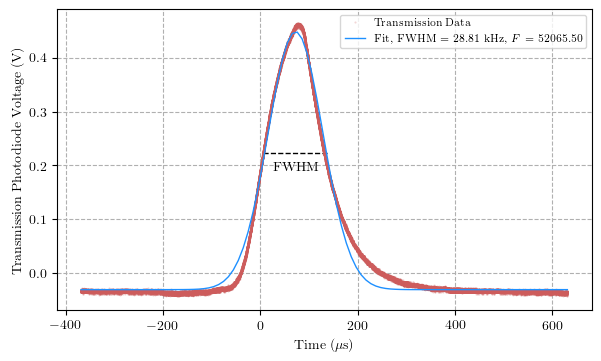

FWHM: -93.91968457268256


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, offset):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2) + offset

# Prepare the data
x = t.values
y = trans.values

# Perform the curve fitting
p0 = [1, np.mean(x), np.std(x), 20]  # Initial guess for the parameters
params, pcov = curve_fit(gaussian, x, y, p0=p0)

# Extract the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]

# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *params)

# plt.figure(figsize=(10,6))

# Plot the full width half maxima as a horizontal line
y_max = max(y_fit)
half_max = y_max / 2
mask = y_fit > half_max
x_fwhm = x_fit[mask]
plt.hlines(half_max, x_fwhm[0]-10, x_fwhm[-1]+10, linestyles='dashed', color='black')
plt.text(x_fwhm[0]+ 10, half_max-0.04, 'FWHM', verticalalignment='bottom', color='black')

conversion_factor = 306.75 # 1 us = 306.75Hz
FWHM_Hz = fwhm * conversion_factor
finesse = 1.5e9/FWHM_Hz

plt.plot(x, y,'.',label='Transmission Data', color='indianred',alpha=0.25)
plt.plot(x_fit, y_fit, color='dodgerblue', label=r'Fit, FWHM = %.2f kHz, $F$ = %.2f'%(-FWHM_Hz/1000,-finesse))
plt.ylabel('Transmission Photodiode Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
# plt.title('Transmission of the cavity during frequency scan with Gaussian Fit')
plt.legend()
plt.show()

print('FWHM:', fwhm)


In [11]:

fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]
conversion_factor = 306.75 # 1 us = 306.75Hz
FWHM_Hz = fwhm * conversion_factor
finesse = 1.5e9/FWHM_Hz

print(fwhm,FWHM_Hz,finesse)

-93.91968457268256 -28809.863242670373 -52065.50226792974


In [12]:
pcov

array([[ 5.03029047e-08,  7.16407193e-14,  2.28119738e-06,
        -3.23360981e-09],
       [ 7.16407193e-14,  8.85078425e-04,  5.94748675e-12,
        -1.80663843e-17],
       [ 2.28119738e-06,  5.94748675e-12,  5.05759427e-04,
         5.37686656e-07],
       [-3.23360981e-09, -1.80663843e-17,  5.37686656e-07,
         4.57301423e-09]])

In [13]:
np.sqrt(np.diag(pcov)[2])

0.02248909573673671

In [14]:
np.sqrt(pcov[2,2])

0.02248909573673671

In [15]:
# extract uncertainty of FWHM, which is the third item (std dev) in fitting
fwhm_err = 2 * np.sqrt(2 * np.log(2))*np.sqrt(pcov[2,2])
    # Recall:
    # fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]
    # conversion_factor = 306.75 # 1 us = 306.75Hz
    # FWHM_Hz = fwhm * conversion_factor
    # finesse = 1.5e9/FWHM_Hz
FWHM_Hz_err = fwhm_err*conversion_factor
finesse_err = (1.5e9/(FWHM_Hz)**2)*FWHM_Hz_err

In [16]:
print('FWHM is {:.4f} +- {:.4f} us'.format(fwhm,fwhm_err))
print('FWHM is {:.4f} +- {:.4f}Hz'.format(FWHM_Hz,FWHM_Hz_err))
print('Finesse is {:.4f} +- {:.4f}'.format(finesse,finesse_err))

FWHM is -93.9197 +- 0.0530 us
FWHM is -28809.8632 +- 16.2448Hz
Finesse is -52065.5023 +- 29.3578


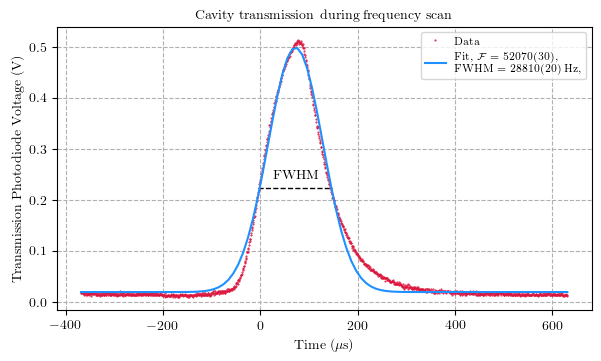

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Gaussian function
def gaussian(x, amplitude, mean, stddev, offset):
    return amplitude * np.exp(-((x - mean) / (2 * stddev))**2) + offset

# Prepare the data
x = t.values
y = trans.values

# Perform the curve fitting
p0 = [1, np.mean(x), np.std(x), 20]  # Initial guess for the parameters
params, pcov = curve_fit(gaussian, x, y, p0=p0)

# Extract the FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * params[2]

# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *params)

# plt.figure(figsize=(10,6))

# Plot the full width half maxima as a horizontal line
y_max = max(y_fit)
half_max = y_max / 2
mask = y_fit > half_max
x_fwhm = x_fit[mask]
plt.hlines(half_max, x_fwhm[0]-20, x_fwhm[-1]+20, linestyles='dashed', color='black')
plt.text(x_fwhm[0]+ 10, half_max+0.01, 'FWHM', verticalalignment='bottom', color='black')

conversion_factor = 306.75 # 1 us = 306.75Hz
FWHM_Hz = fwhm * conversion_factor
finesse = 1.5e9/FWHM_Hz

y_new = y + 0.05  # Shift the y values up by 0.05 for better visibility
y_fit_new = y_fit + 0.05  # Shift the fitted y values up by 0.05 for better visibility

plt.plot(x[::50], y_new[::50],'.',label='Data', color='crimson',alpha=1)
plt.plot(x_fit, y_fit_new, color='dodgerblue', linewidth=1.5, label=r'Fit, $\mathcal{F}$ = %.d(%.d),'%(-np.round(finesse,-1),np.round(finesse_err,-1)) + '\n' + r'FWHM = %.0f(%.0f) Hz,'%(-FWHM_Hz,np.round(FWHM_Hz_err,-1)))
plt.ylabel('Transmission Photodiode Voltage (V)')
plt.xlabel(r'Time ($\mu$s)')
plt.title('Cavity transmission during frequency scan')
plt.legend(loc='upper right')
# plt.ylim(0,0.6)
# plt.show()

plt.savefig("250520 CavityTransmissionPeakFitFinesse.pdf",dpi=300)
